In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(context='paper', style='darkgrid',palette='dark', font_scale=1.2)
%matplotlib inline

In [2]:
test=pd.read_csv("test.csv")
train=pd.read_csv("train.csv")

In [3]:
train.sample(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
665,0693_01,Europa,True,NaN,55 Cancri e,35.0,False,0.0,0.0,0.0,NaN,0.0,Mothab Dedometeel,True
8146,8708_01,Earth,False,G/1413/P,PSO J318.5-22,28.0,False,679.0,0.0,0.0,0.0,0.0,Annard Jacostaffey,False
5248,5601_04,Earth,False,F/1069/S,TRAPPIST-1e,21.0,False,958.0,1668.0,82.0,0.0,78.0,Vanney Vandan,True
7198,7692_01,Europa,False,C/287/S,55 Cancri e,32.0,True,0.0,48.0,0.0,3204.0,112.0,Meropus Aroodint,False
643,0674_01,Earth,True,G/101/S,PSO J318.5-22,46.0,False,0.0,0.0,0.0,0.0,0.0,Grette Dillips,False
3648,3923_01,Earth,False,F/808/P,TRAPPIST-1e,18.0,False,95.0,0.0,0.0,13.0,622.0,Jenne Cofferson,False
1427,1507_01,Earth,False,F/289/S,TRAPPIST-1e,43.0,False,0.0,0.0,1217.0,2.0,0.0,NaN,True
1990,2128_01,Earth,False,G/344/P,TRAPPIST-1e,22.0,False,624.0,0.0,0.0,0.0,185.0,Artis Sancockett,False
2077,2228_01,Mars,False,E/158/S,TRAPPIST-1e,63.0,False,1172.0,0.0,1.0,NaN,0.0,Basps Rasty,False
1534,1626_01,Earth,False,F/324/P,TRAPPIST-1e,19.0,False,NaN,9.0,0.0,0.0,1.0,Raceky Logannon,False


In [4]:
train.shape

(8693, 14)

In [5]:
# Lets get the dtypes for each col
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
# Imp Stats about Data
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

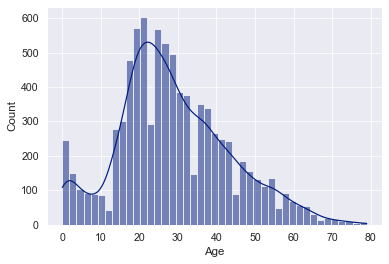

In [8]:
sns.histplot(x=train['Age'],kde=True,palette="coolwarm")

<AxesSubplot:xlabel='VIP', ylabel='count'>

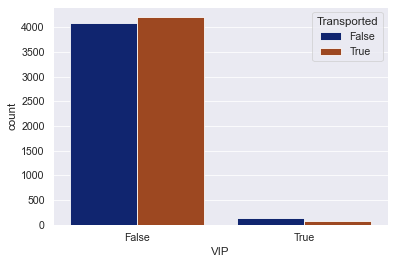

In [9]:
sns.countplot(x=train['VIP'], hue=train["Transported"])

# INSIGHTS
* Most People are not VIP 
* We can see that Less VIP's are transported
* Null vals in Age can be filled using median
* Null vals in VIP can be filled with mode/most_frequent

Text(0.5, 1.0, 'Reln b/w Cryo and Transported')

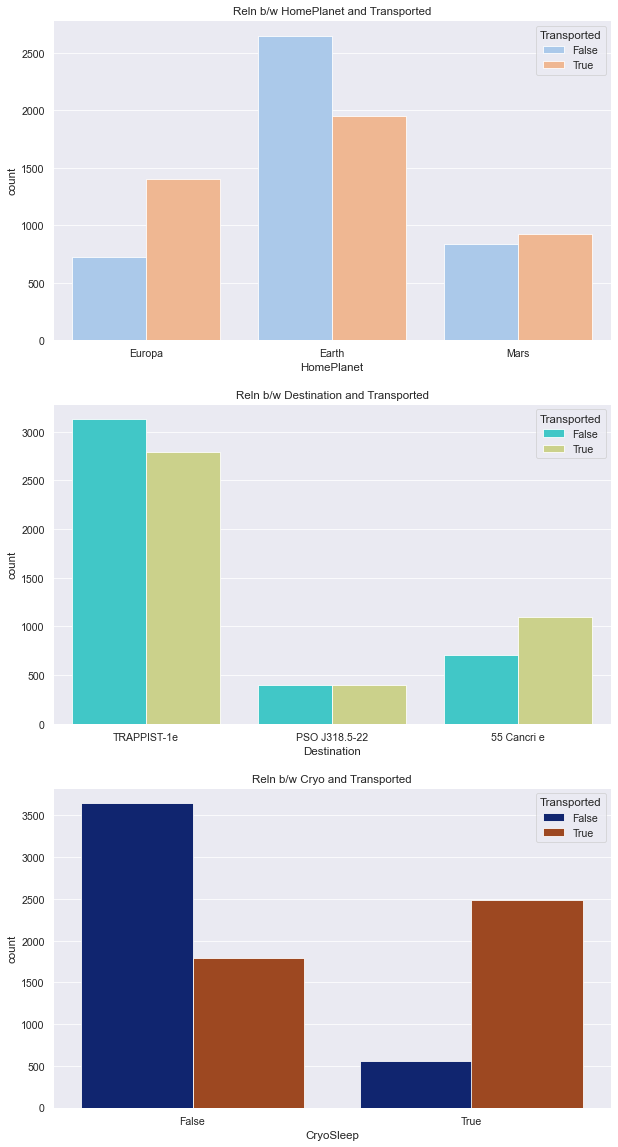

In [10]:
fig,axes=plt.subplots(nrows=3,ncols=1,figsize=(10,20))
sns.countplot(x=train["HomePlanet"],hue=train["Transported"],ax=axes[0],palette="pastel")
axes[0].set_title("Reln b/w HomePlanet and Transported")

sns.countplot(x=train["Destination"],hue=train["Transported"],ax=axes[1],palette="rainbow")
axes[1].set_title("Reln b/w Destination and Transported")

sns.countplot(x=train["CryoSleep"],hue=train["Transported"],ax=axes[2])
axes[2].set_title("Reln b/w Cryo and Transported")

In [11]:
train["HomePlanet"].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [12]:
train["Destination"].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [13]:
train["CryoSleep"].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

# INSIGHTS
* Most People are tend to be from Earth 
* Most People are destined to TRAPPIST-1e
* If Person is in Cryo then chances of getting transpoted are much higher
* People are less likely to be in cryo

In [23]:
train[["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]].describe()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,224.687617,458.077203,173.729169,311.138778,304.854791
std,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,47.000000,76.000000,27.000000,59.000000,46.000000
max,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [26]:
train[["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]].value_counts()

RoomService  FoodCourt  ShoppingMall  Spa    VRDeck
0.0          0.0        0.0           0.0    0.0       3247
                        717.0         0.0    0.0          3
                        885.0         0.0    0.0          3
             717.0      0.0           0.0    0.0          2
             0.0        0.0           0.0    907.0        2
                                                       ... 
             1971.0     77.0          577.0  1050.0       1
             1972.0     0.0           108.0  5.0          1
             1975.0     598.0         7.0    3726.0       1
             1983.0     0.0           172.0  52.0         1
14327.0      1487.0     0.0           1.0    0.0          1
Length: 4526, dtype: int64

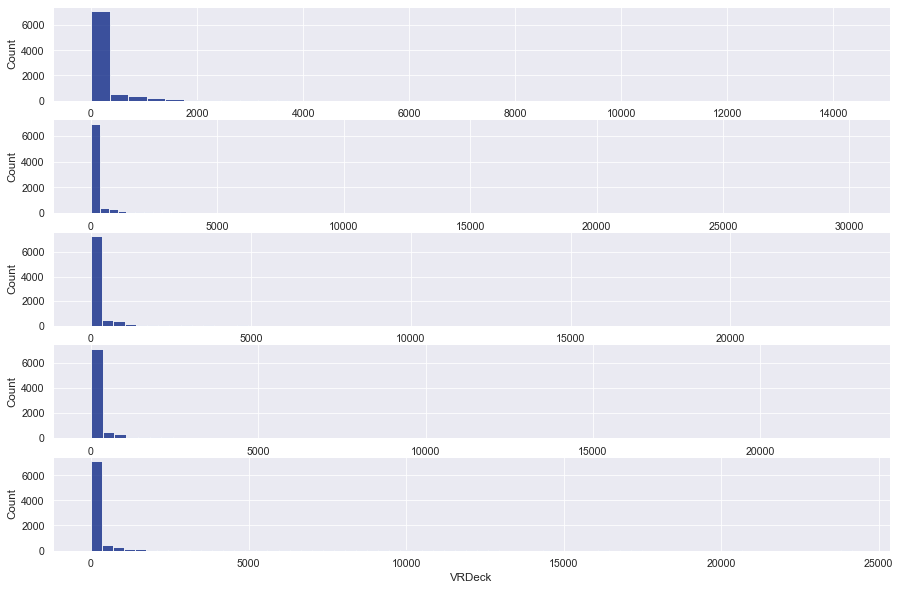

In [31]:
exp_cols=["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]
fig,axes=plt.subplots(nrows=5,ncols=1,figsize=(15,10))
for idx,col in enumerate(exp_cols):
    sns.histplot(train[col],ax=axes[idx],binwidth=350)

In [22]:
expenditures=np.array(["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"])
train.fillna(train[expenditures].median(),inplace=True)
train.isna().sum()


,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,224.687617,458.077203,173.729169,311.138778,304.854791
std,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,47.000000,76.000000,27.000000,59.000000,46.000000
max,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [67]:
train["TotalExpenditure"]=train[["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]].sum(axis=1)
train.drop(["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"],inplace=True,axis=1)
train.sample(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Name,Transported,TotalExpenditure
4725,5040_02,Europa,False,C/195/S,55 Cancri e,39.0,False,Alsha Dynigic,False,6526.0
8535,9114_01,Europa,True,B/348/S,55 Cancri e,38.0,False,Phargak Healist,True,0.0
3668,3939_01,Earth,False,E/237/P,TRAPPIST-1e,37.0,False,Eriana Alberts,False,1618.0
3729,4001_03,Earth,True,G/659/S,PSO J318.5-22,4.0,False,Leahy Lowelliott,True,0.0
3843,4113_01,Europa,True,B/129/P,55 Cancri e,16.0,False,Taraid Bradiary,True,0.0
7918,8458_02,Europa,True,C/319/S,55 Cancri e,24.0,False,Canon Sempreate,True,0.0
8538,9118_01,Earth,False,E/585/P,55 Cancri e,13.0,False,Glenry Malliamsey,True,1692.0
6861,7257_01,Earth,True,G/1167/P,55 Cancri e,14.0,False,Rica Gardsondez,True,0.0
3418,3682_01,Mars,True,F/761/P,TRAPPIST-1e,19.0,False,Wealke Ica,True,0.0
2965,3211_02,Earth,False,G/521/P,55 Cancri e,43.0,False,Maura Baldson,False,888.0


In [68]:
# Let see if there is any correlation b/w total expenditure and other vals
train.corr()

,Age,Transported,TotalExpenditure
Age,1.000000,-0.075026,0.186530
Transported,-0.075026,1.000000,-0.199514
TotalExpenditure,0.186530,-0.199514,1.000000


In [69]:
train.groupby(train["Transported"])["TotalExpenditure"].mean()

Transported
False    2004.149247
True      885.689127
Name: TotalExpenditure, dtype: float64

# INSIGHT
* People Who tend to spend less are more viable to get transported
* Young People are transported more often

In [70]:
train.isna().sum()

PassengerId           0
HomePlanet          201
CryoSleep           217
Cabin               199
Destination         182
Age                 179
VIP                 203
Name                200
Transported           0
TotalExpenditure      0
dtype: int64

# INSIGHTS
* We can remove Name Col as it does not depend on Name that wether u will be transported or not
* Similarly we can Drop PassengerID

In [71]:
train.dropna(subset=["Cabin"],inplace=True)

In [72]:
train["Decks"]=train["Cabin"].apply(lambda cabin:cabin[0])
train["Sides"]=train["Cabin"].apply(lambda cabin:cabin[-1])
train.drop(["Cabin"],inplace=True,axis=1)

In [73]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Name,Transported,TotalExpenditure,Decks,Sides
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,Maham Ofracculy,False,0.0,B,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,Juanna Vines,True,736.0,F,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,Altark Susent,False,10383.0,A,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,Solam Susent,False,5176.0,A,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,Willy Santantines,True,1091.0,F,S


Text(0.5, 1.0, 'Reln b/w Sides and Transported')

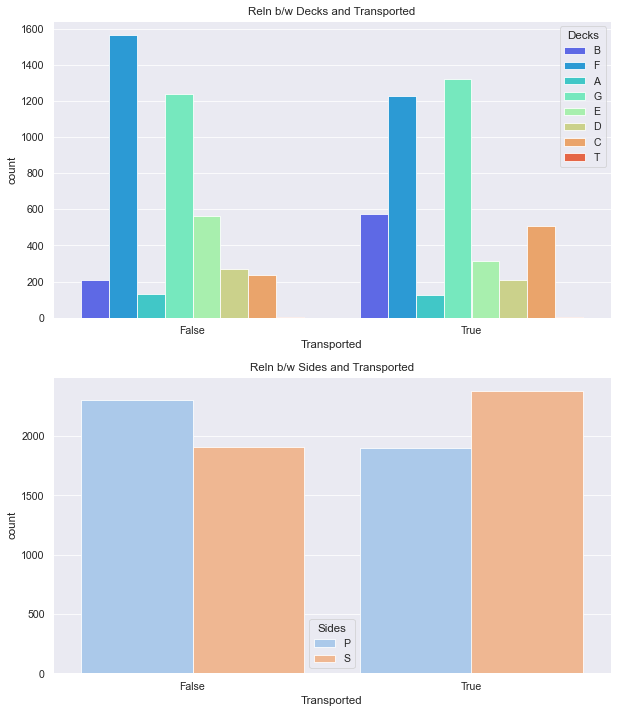

In [74]:
fig,axes=plt.subplots(nrows=2,ncols=1,figsize=(10,12))
sns.countplot(x=train["Transported"],hue=train["Decks"],ax=axes[0],palette="rainbow")
axes[0].set_title("Reln b/w Decks and Transported")

sns.countplot(x=train["Transported"],hue=train["Sides"],ax=axes[1],palette="pastel")
axes[1].set_title("Reln b/w Sides and Transported")

# INSIGHTS
* We can see that Sides don't really affect weather people will be transported or not but decks certainly do

Text(0.5, 1.0, 'Reln b/w Destination and Decks')

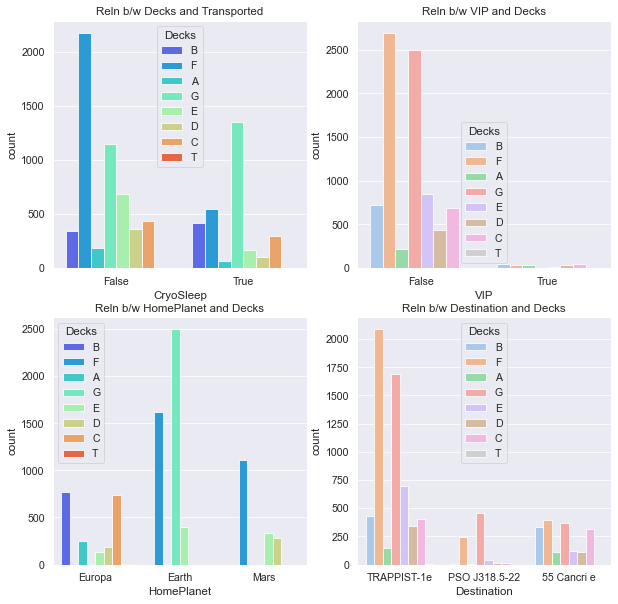

In [75]:
# Why-Decks 
# May be because some VIP's tend to stay in some specefic decks or maybe because some decks are used for Cryo patients
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(10,10))
sns.countplot(x=train["CryoSleep"],hue=train["Decks"],ax=axes[0,0],palette="rainbow")
axes[0,0].set_title("Reln b/w Decks and Transported")

sns.countplot(x=train["VIP"],hue=train["Decks"],ax=axes[0,1],palette="pastel")
axes[0,1].set_title("Reln b/w VIP and Decks")

sns.countplot(x=train["HomePlanet"],hue=train["Decks"],ax=axes[1,0],palette="rainbow")
axes[1,0].set_title("Reln b/w HomePlanet and Decks")

sns.countplot(x=train["Destination"],hue=train["Decks"],ax=axes[1,1],palette="pastel")
axes[1,1].set_title("Reln b/w Destination and Decks")

In [ ]:
# Now Lets Train Model according to all the drawn insights
# Chk Model.ipynb